In [1]:
"""Import libraries for make some calculations with data and understand data."""
import pandas as pd
import numpy as np

In [144]:
"""With pandas library read csv file for importing python."""
df = pd.read_csv('penguins_size.csv')

In [3]:
"""Show first 5 row in dataframe."""
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
"""It shows how many column and row dataframe has"""
df.shape

(344, 7)

In [5]:
"""You can analyze data easily with info command"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
"""You can get some analyses from dataframe"""
df.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [10]:
"""You can see correlations between columns but you can't relize easily because there is no graph."""
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [14]:
"""For understanding correlation visualization is very important. Now you are going to visualize correlation."""
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

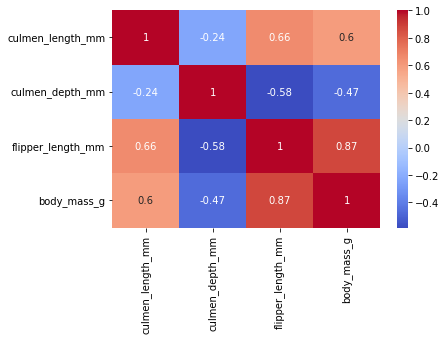

In [18]:
"""We use heatmap for understanding correlation. As you can see I use annot command because I want to see values 
   inside the graph and I use cmap command because I want to see with colors which I can decide easily high correlation."""
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")

In [24]:
"""Create table with find NA values and calculate it as percentage because in big datas you must calculate percentage of na values"""
nan_percentage = df.isnull().sum() / df.count() * 100
nan_count = df.isnull().sum() 

In [26]:
"""Calculate and give output"""
nan_table = pd.concat([nan_count,nan_percentage],axis=1)
nan_table.columns = ["Count","Percentage"]
nan_table

,Count,Percentage
species,0,0.000000
island,0,0.000000
culmen_length_mm,2,0.584795
culmen_depth_mm,2,0.584795
flipper_length_mm,2,0.584795
body_mass_g,2,0.584795
sex,10,2.994012


# Fill missing values

In [86]:
cat_x = df.select_dtypes(include=['object']).columns.tolist()
num_x = df.select_dtypes(include=['float64']).columns.tolist()

In [87]:
cat_x

['species', 'island', 'sex']

In [115]:
for i in df:
    if i in num_x:
        df[i].fillna(df[i].median(), inplace=True)
    else :
        df[i].fillna(df[i].value_counts().idxmax(), inplace=True)
        

In [116]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Or use SimpleImputer

In [147]:
from sklearn.impute import SimpleImputer

In [148]:
"""Fill Na values with most frequent value."""
imputer = SimpleImputer(strategy="most_frequent")

In [149]:
df.iloc[:,:] = imputer.fit_transform(df)

In [150]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [151]:
df["sex"].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

# LabelEncoder


In [152]:
from sklearn.preprocessing import LabelEncoder

In [153]:
"""We use label encoder because of data processing. For example Male turning to 2 and 
female to 1 for understanding easily for computer."""
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])

In [155]:
df["sex"].value_counts()

2    178
1    165
0      1
Name: sex, dtype: int64

# Visualization

In [161]:
"""I use reset_index code because it changed value_counts like dataframe and you can
plot easily."""
species_count = df["species"].value_counts().reset_index()

In [164]:
species_count

,index,species
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


<AxesSubplot:xlabel='index', ylabel='species'>

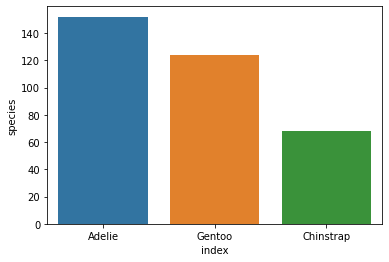

In [165]:
sns.barplot(data =species_count,x="index",y="species")

In [169]:
df[df["species"] == "Gentoo"]["culmen_depth_mm"]

,index,culmen_depth_mm
0,220,13.2
1,221,16.3
2,222,14.1
3,223,15.2
4,224,14.5
...,...,...
119,339,17.0
120,340,14.3
121,341,15.7
122,342,14.8


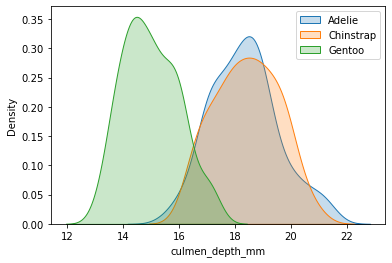

In [186]:
for i in df["species"].unique():
    sns.kdeplot(df[df["species"] == i]["culmen_depth_mm"],shade=True, label=i)
    plt.legend()
    

